**Итоговый проект «Анализ временных рядов»** Николаенко Роман.

<h1>Математические основы машинного обучения III. Итоговый проект (vo_PJ)</h1>


<h2>Итоговый проект «Анализ временных рядов»

<h3>Цель проекта:</h3>

<p>Провести анализ выбранного временного ряда в соответствии с примерами из практических материалов курса.
<p>Ознакомьтесь с содержанием демонстрационных блокнотов, в которых реализованы методы визуализации, предсказания и классификации временных рядов
<p>Примеры тем: скачайте уже знакомый вам набор данных для анализа временных рядов для открытых энергетических систем: https://data.open-power-system-data.org/time_series/2020-10-06. Выберите 1 набор данных (столбец) из представленных аналогично тому, как это было сделано в примерах. Допустим выбор любого столбца, кроме рассмотренного в примерах (в примерах рассмотрена страна Германия, столбец «Общее энергопотребление», а также в первом занятии — столбец «Потребление ветряной энергии в Германии»). Могут быть выбраны и другие наборы данных. Например, набор запросов на такси.

<p>По результатам анализа ожидается отчет, включающий следующие пункты:
<ul>
<li>Результаты предварительного анализа выбранного однопеременного ВР. </li>
<li>Сравнение не менее 3-х методов предсказаний значений ВР по выбранной метрике точности и визуально. Соответственно рекомендации по выбору метода.</li>
<li>Отчет о выборе параметров модели SARIMA (можно в режиме автовыбора или ручном режиме, возможна их комбинация). Отчет также должен включать описание остаточной части предсказания.</li>
<li>Сравнение выбранных методов предсказаний и результатов работы настроенной модели SARIMA.</li>
<li>Аналогично примерам (классификация временных рядов) анализ выбранного однопеременного ряда на предмет классификации его сегментов. Задачу можно сформулировать самостоятельно, например, как синтетическую для того же набора данных, который использовался для предсказания. Можно выбрать и новый набор данных. Результатом анализа должна быть таблица не менее чем из 3-х методов, которые сравнены по точности. </li>
<li>Отчет об исследовании выбранной задачи классификации  при помощи глубоких нейронных сетей в пакете tsai. Исследование может быть проведено аналогично примеру. Результат анализа — рекомендованная архитектура нейронной сети. Архитектура должна быть сравнена с методам классификации из пункта выше.</li>
<li>Отчет о выявлении аномалий во временном ряду. Может быть выбран ВР, использованный ранее. Отчет должен включать результаты анализа не менее чем 3-х методов аналогичных тем, что в примерах. Отчет может быть произведен в текстовом виде, например, как наиболее частые типы аномалий или гипотезы о причинах их появления. Также в отчет можно включить рекомендации по выбору и настройке методов выявления аномалий.</li>
    </ul>

<h2>1. Предварительный анализ временного ряда</h2>

In [1]:
# Импортируем нужные библиотеки

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates #Date Parser

import seaborn as sns
sns.set_style('white')
sns.set(rc={'figure.figsize':(11, 4)})

Для анализа был выбран временной ряд https://github.com/numenta/NAB/blob/master/data/realTweets/Twitter_volume_AMZN.csv, в котором указано количество упоминаний компании "Amazon" в Twitter с пятиминутным интервалом.

In [2]:
# Загружаем данные (https://github.com/numenta/NAB/blob/master/data/realTweets/Twitter_volume_AMZN.csv)

data = pd.read_csv('Twitter_volume_AMZN.csv', index_col='timestamp', parse_dates=True)
data.head()

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15831 entries, 2015-02-26 21:42:53 to 2015-04-22 20:52:53
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   15831 non-null  int64
dtypes: int64(1)
memory usage: 247.4 KB


In [4]:
data.describe()

,value
count,15831.000000
mean,53.298465
std,30.553147
min,0.000000
25%,36.000000
50%,50.000000
75%,65.000000
max,1673.000000


Вывод графика временного ряда

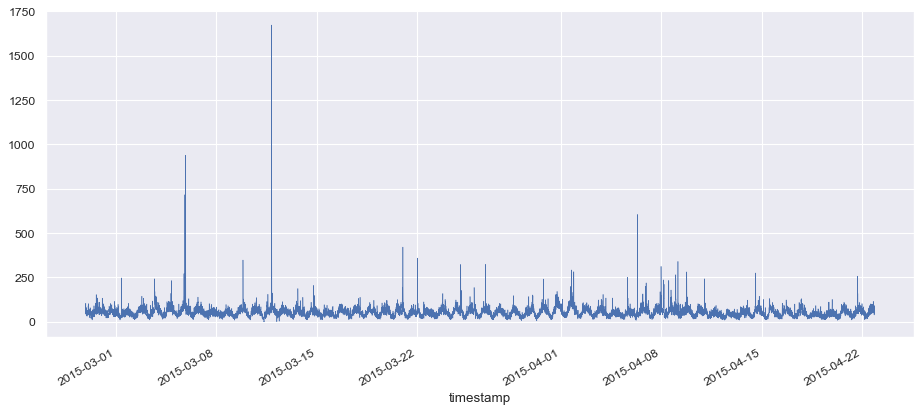

In [5]:
figure(figsize=(14, 6), dpi=80)
data['value'].plot(linewidth=0.5);

In [6]:
print(data.index.min(), data.index.max())

2015-02-26 21:42:53 2015-04-22 20:52:53


In [7]:
data['date'] = pd.to_datetime(data.index).date
data['h'] = pd.to_datetime(data.index).hour

In [8]:
data.head()

,value,date,h
timestamp,,,
2015-02-26 21:42:53,57,2015-02-26,21
2015-02-26 21:47:53,43,2015-02-26,21
2015-02-26 21:52:53,55,2015-02-26,21
2015-02-26 21:57:53,64,2015-02-26,21
2015-02-26 22:02:53,93,2015-02-26,22


In [9]:
df = data.groupby('date').sum()

In [10]:
df.drop(df.tail(1).index,inplace=True)
df.drop(df.head(1).index,inplace=True)

Построим график суммарных показателей за сутки (за весь период)

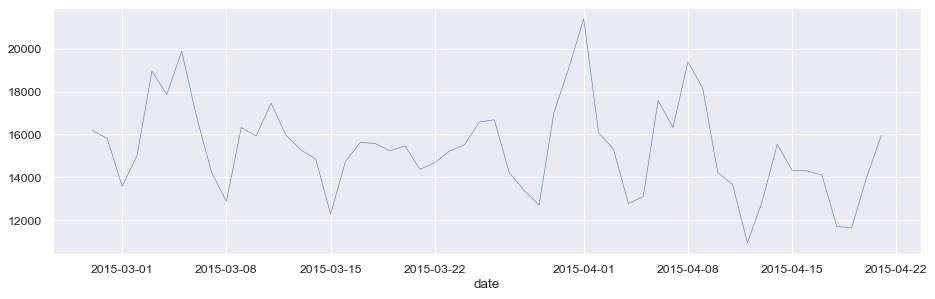

In [11]:
figure(figsize=(14, 4), dpi=80)
df['value'].plot(linewidth=0.5);
plt.show()

Построим график почасовых суммарных показателей (за весь период)

In [12]:
# Формируем датасет с почасовой статистикой
numeric_df = data.select_dtypes(include=['number'])
df_h = numeric_df.groupby(pd.Grouper(freq='1h')).sum()
df_h.drop(df_h.tail(1).index, inplace=True)
df_h.drop(df_h.head(1).index, inplace=True)
df_h.sample(6)


,value,h
timestamp,,
2015-03-15 11:00:00,604,132
2015-02-26 23:00:00,568,276
2015-04-16 14:00:00,809,168
2015-03-18 16:00:00,848,192
2015-04-12 18:00:00,561,216
2015-04-06 22:00:00,1188,264


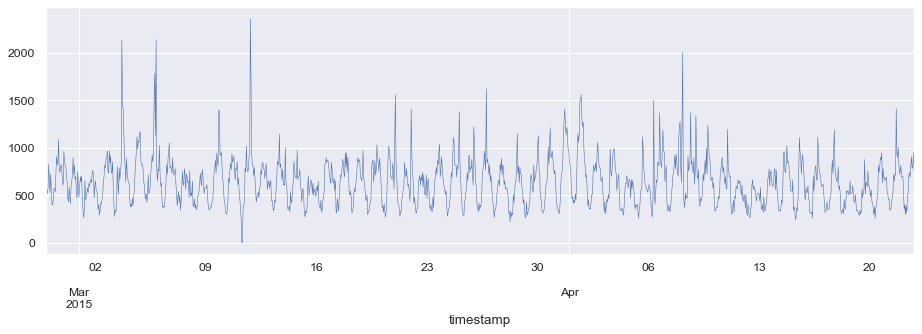

In [13]:
figure(figsize=(14, 4), dpi=80)
df_h['value'].plot(linewidth=0.5)
plt.show()

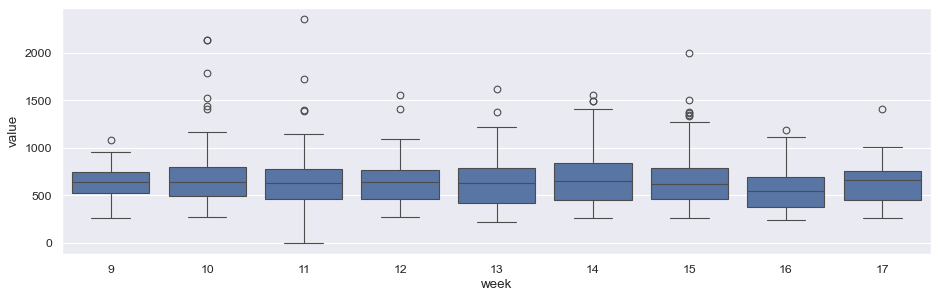

In [14]:
figure(figsize=(14, 4), dpi=80)
ax = sns.boxplot(data=df_h, x=pd.to_datetime(df_h.index).isocalendar().week, y='value')
ax.set_ylabel('value')
ax.set_xlabel('week')
plt.show()

Наложение почасового и среднесуточного графика

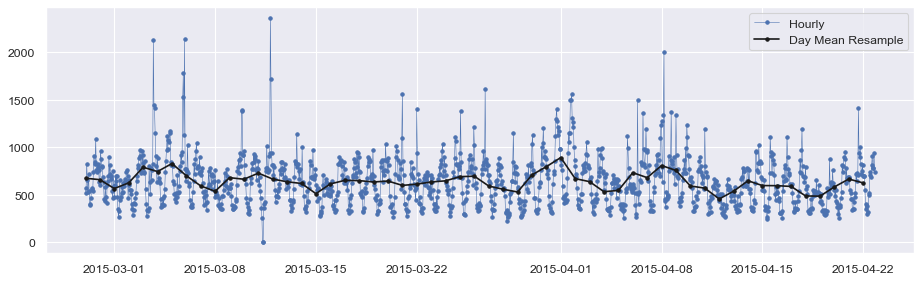

In [15]:
start, end = '2015-02-27', '2015-04-22'

fig, ax = plt.subplots(figsize=(14, 4), dpi=80)
ax.plot(df_h.loc[start:end, 'value'],marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_h.resample('D').mean().loc[start:end, 'value'], marker='o', 
        markersize=3, linestyle='-', label='Day Mean Resample', color='k')
ax.legend();

Выбор произвольных двух недель

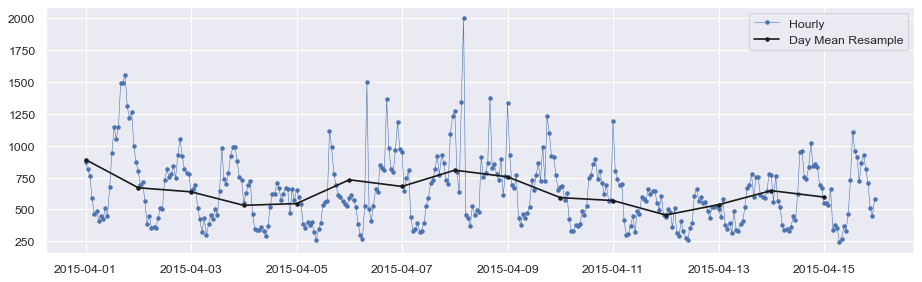

In [16]:
start, end = '2015-04-01', '2015-04-15'

fig, ax = plt.subplots(figsize=(14, 4), dpi=80)
ax.plot(df_h.loc[start:end, 'value'],marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_h.resample('D').mean().loc[start:end, 'value'], marker='o', markersize=3, linestyle='-', label='Day Mean Resample', color='k')
ax.legend();

Построение графика средних почасовых значений за весь период

<Axes: xlabel='h'>

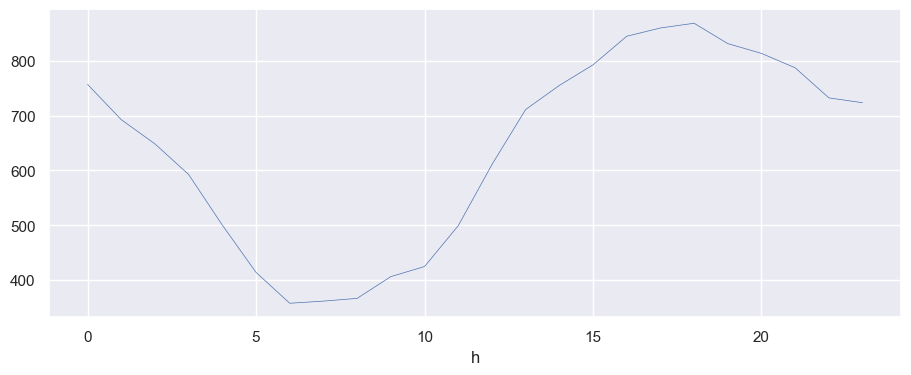

In [17]:
df_h.h = pd.to_datetime(df_h.index).hour

df_h_h = df_h.groupby('h').mean()

df_h_h['value'].plot(linewidth=0.5)

<h3>Вывод:</h3> <p>
Из предварительного анализа временного ряда следует, что ряд данных имеет как суточную, так и недельную сезонность.

<h2>2. Сравнение методов предсказания временного ряда</h2>

In [18]:
# импортируем необходимые библиотеки

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import sktime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier



r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))

warnings.simplefilter("ignore", FutureWarning)
%matplotlib inline

In [19]:
df_h.head()

,value,h
timestamp,,
2015-02-26 22:00:00,931,22
2015-02-26 23:00:00,568,23
2015-02-27 00:00:00,516,0
2015-02-27 01:00:00,574,1
2015-02-27 02:00:00,824,2


In [20]:
df_h.value = df_h.value.astype('float')
y = df_h.value
y

timestamp
2015-02-26 22:00:00    931.0
2015-02-26 23:00:00    568.0
2015-02-27 00:00:00    516.0
2015-02-27 01:00:00    574.0
2015-02-27 02:00:00    824.0
                       ...  
2015-04-22 15:00:00    906.0
2015-04-22 16:00:00    787.0
2015-04-22 17:00:00    785.0
2015-04-22 18:00:00    945.0
2015-04-22 19:00:00    740.0
Freq: H, Name: value, Length: 1318, dtype: float64

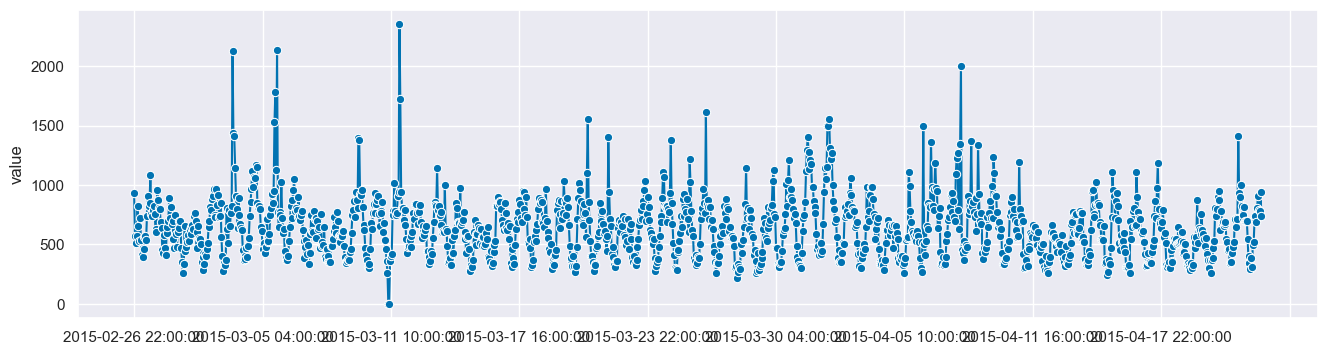

In [21]:
sktime.utils.plotting.plot_series(y);

Разделим временной ряд на обучающую и тестовую выборки

Check splitted data size: Train: 725, Test: 593


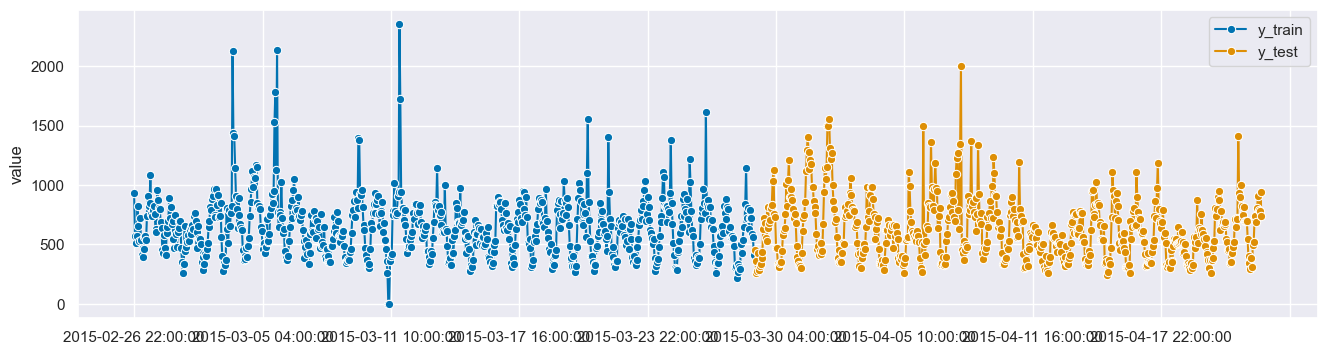

In [22]:
TEST_SIZE = int(0.45*y.size)

y_train, y_test = temporal_train_test_split(y, test_size=TEST_SIZE)

print(f'Check splitted data size: Train: {y_train.shape[0]}, Test: {y_test.shape[0]}')

sktime.utils.plotting.plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [23]:
y_train.to_csv('train.csv', index_label='timestamp') 
y_test.to_csv('test.csv', index_label='timestamp') 
df_h.to_csv('data.csv', index_label='timestamp') 

На графиках видны выбросы, которые носят случайный характер и могли быть вызваны какими-либо событиями локального характера от сбоев на Твиттере (когда 0 упоминаний) до резкого изменения курса акций Amazon (в максимумах). Для создания более точных моделей предсказаний нужно избавиться от выбросов в обучающей выборке.

In [24]:
for i in range(len(y_train)):
    if y_train[i] > 1400:
        y_train[i] = 1400
    if y_train[i] < 250:
        y_train[i] = 250
        

In [25]:
# ГОРИЗОНТ
#fh = np.arange(y_test.size) + 1
fh = ForecastingHorizon(y_test.index, is_relative=False)

 Для оценки точности предсказаний используем симметричную среднюю процентную ошибку (<b>symmetry Mean Average Percentage Error, sMAPE</b>) 
    $$ sMAPE =\frac{1}{H}\sum_{i=1}^{H} \frac{|y(h_i) − \hat{y}(h_i)|}{|y(h_i)| + |\hat{y}(h_i)|}
 $$

Для прогнозирования используем наивное сезонное предсказание с суточной сезонностью.

sMAPE = 0.195


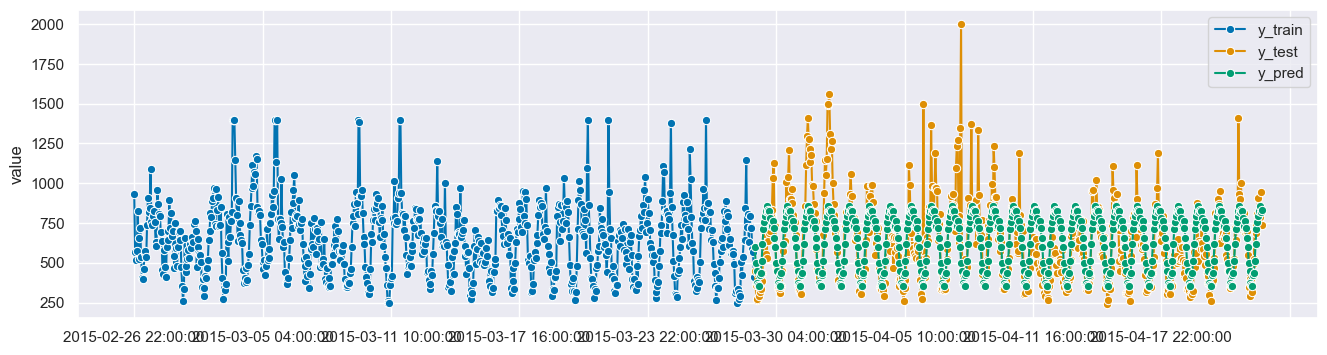

In [26]:
SEASON = 24

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.176


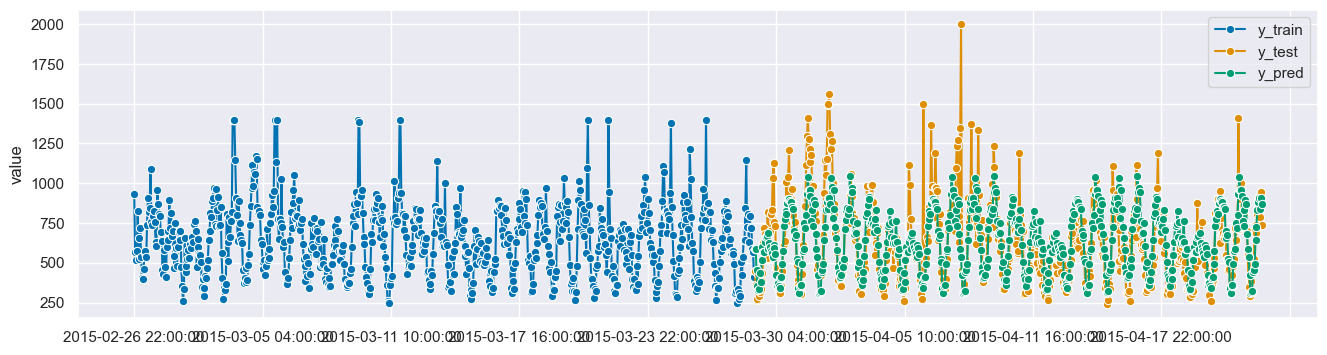

In [27]:
SEASON = 24*7

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Наивное сезонное предсказание не показало необходимой нам точности.

Пробуем ThetaForecaster

sMAPE = 0.180


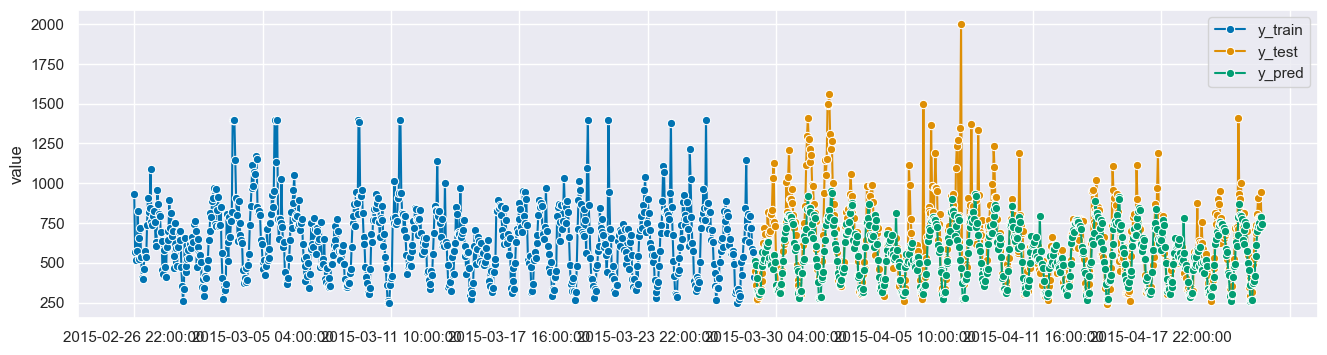

In [28]:
forecaster = ThetaForecaster(sp=SEASON)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Используем экспоненциальное сглаживание:

sMAPE = 0.232


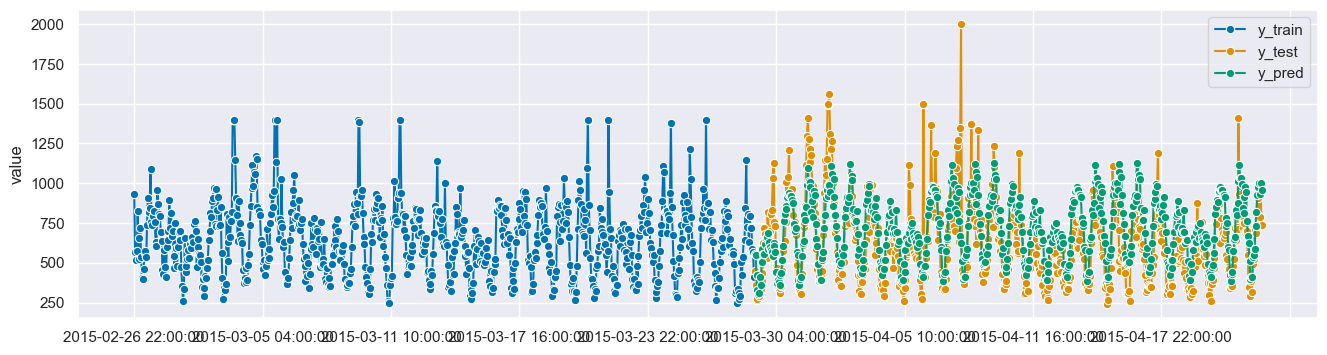

In [29]:
SEASON = 24*7

# МЕТОДЫ
forecaster = ExponentialSmoothing(trend="mul", seasonal="add", sp=SEASON, method='ls')

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Построение пайплайна с предварительной обработкой сезонности и последующим применением экспоненциального сглаживания.

sMAPE = 0.173


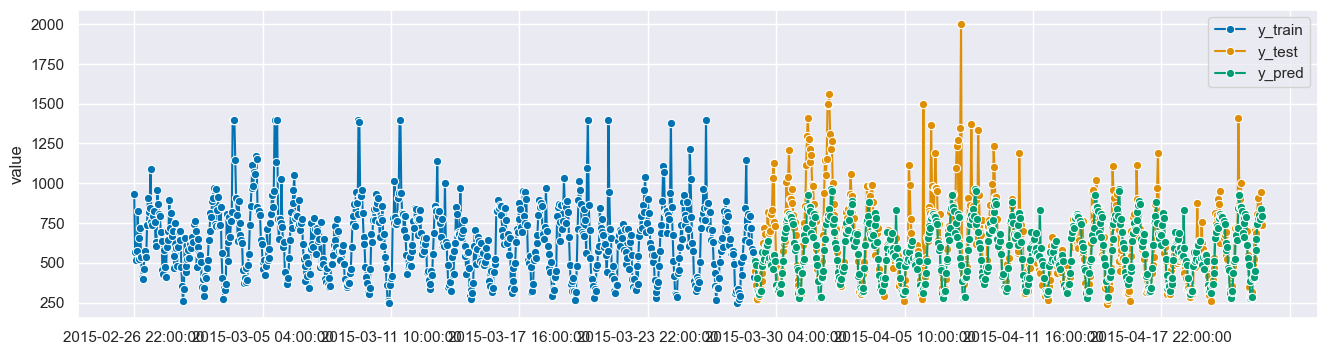

In [30]:
ses = ExponentialSmoothing()

# пайплайн
forecaster = TransformedTargetForecaster(
                steps=[
                ("deseasonalize1", Deseasonalizer(model="multiplicative", sp=24)),
                ("deseasonalize2", Deseasonalizer(model="multiplicative", sp=24*7)),
                ("forecaster", ses),
                ])
forecaster.fit(y_train)

# Предсказание
y_pred = forecaster.predict(fh)

# Результаты
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

<h3>Выводы:</h3>

В целом, различные примененные методы демонстрировали сходную точность. Самая точная модель была получена с использованием пайплайна.

<h2>3. Применение SARIMA</h2>

In [31]:
try:
    import sktime
except:
    !pip install sktime --user
    !pip install pmdarima
    !pip install statsmodels
    !pip install prophet
import sktime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sktime.utils.plotting import plot_series
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)
r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

Проверим стационарность ряда.

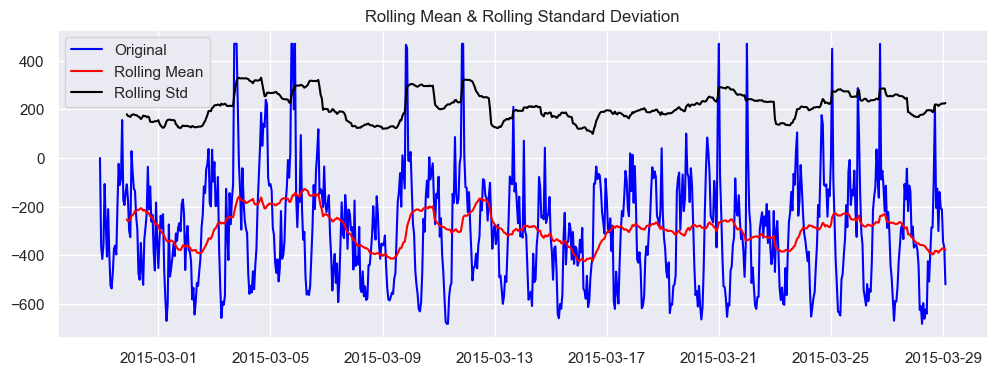

In [32]:
rolling_mean = y_train.rolling(window = 24).mean()
rolling_std  = y_train.rolling(window = 24).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_train-y_train[0],      color = 'blue',  label = 'Original')
plt.plot(rolling_mean-y_train[0], color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,             color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [33]:
P_THRESHOLD = 0.05
def check_ADF(y, p_threshold = P_THRESHOLD):
    result = adfuller(y)
    adf_value = result[0]
    p_value   = result[1]
    print('ADF Statistic: {:.4f}'.format(adf_value))
    print('p-value: {:.4f}'.format(p_value))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}, {}'.format(key, value, 'outperformed' if adf_value>value else ""))    
    print(f'Result: The series is {"not " if p_value < p_threshold else ""}stationary')
    return result

check_ADF(y_train, p_threshold = P_THRESHOLD);

ADF Statistic: -4.2143
p-value: 0.0006
Critical Values:
	1%: -3.4397, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


Ряд нестационарен. Попробуем добиться стационарности дифференцированием.

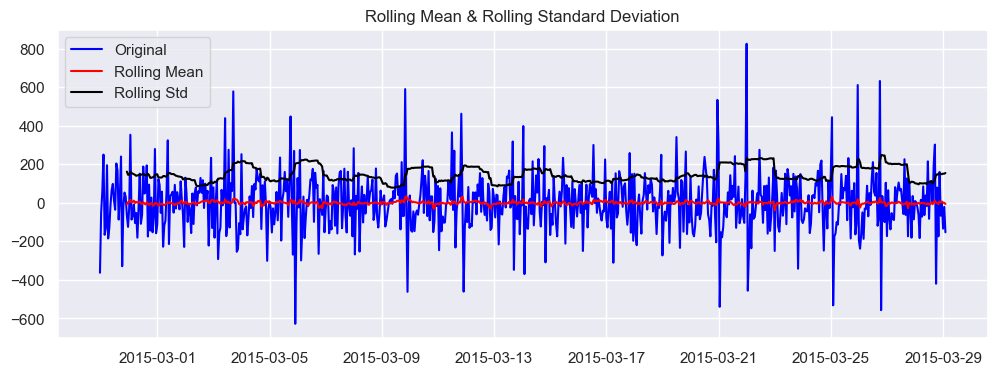

ADF Statistic: -16.6502
p-value: 0.0000
Critical Values:
	1%: -3.4397, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


In [34]:
y_diff = y_train[:].diff(1).dropna()

rolling_mean = y_diff.rolling(window = 24).mean()
rolling_std  = y_diff.rolling(window = 24).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_diff,       color = 'blue',  label = 'Original')
plt.plot(rolling_mean, color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,  color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = check_ADF(y_diff)

Ряд по-прежнему нестационарен. Применим сезонное диференцирование. За цикл примем сутки (24 часа).

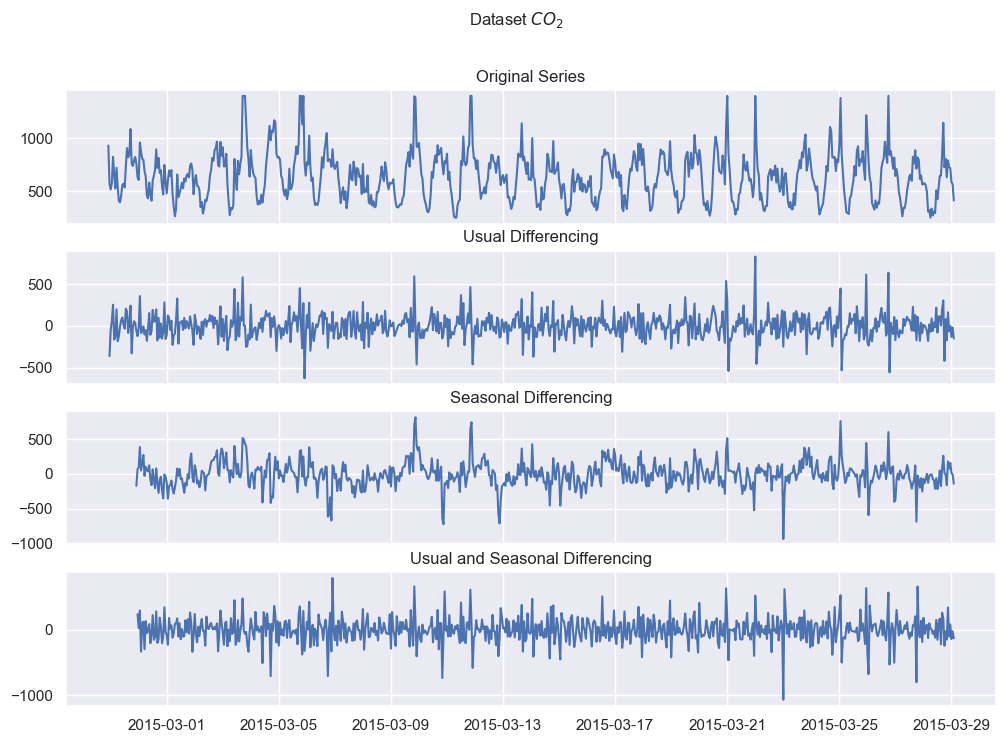

In [35]:
SEASON = 24

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12,8), dpi=100, sharex=True)

# Original Series
axes[0].plot(y_train[:])
axes[0].set_title('Original Series')

# Usual Differencing
axes[1].plot(y_train[:].diff(1))
axes[1].set_title('Usual Differencing')

# Seasinal Differencing
axes[2].plot(y_train[:].diff(SEASON))
axes[2].set_title('Seasonal Differencing')

# Seasinal and Usual Differencing
axes[3].plot(y_train[:].diff(1).diff(SEASON))
axes[3].set_title('Usual and Seasonal Differencing')

plt.suptitle('Dataset $CO_2$', fontsize=12)
plt.show()

In [36]:
y_sdif = y_train[:].diff(1).diff(SEASON).dropna()
results = check_ADF(y_sdif);

ADF Statistic: -14.2574
p-value: 0.0000
Critical Values:
	1%: -3.4398, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


После дифференцирования ряд остался нестационарным.

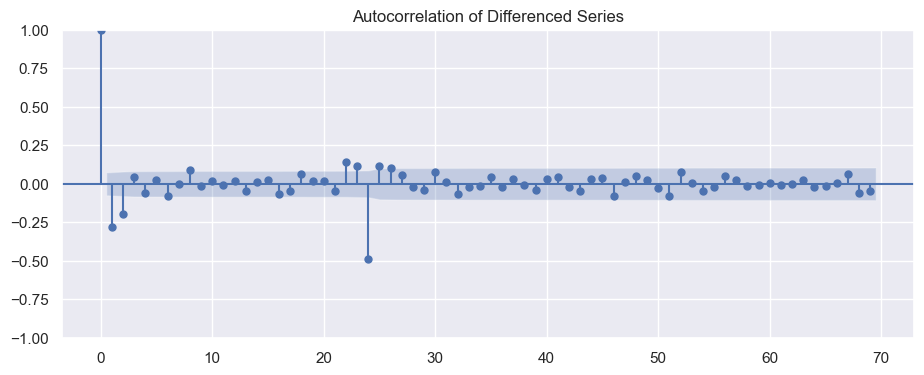

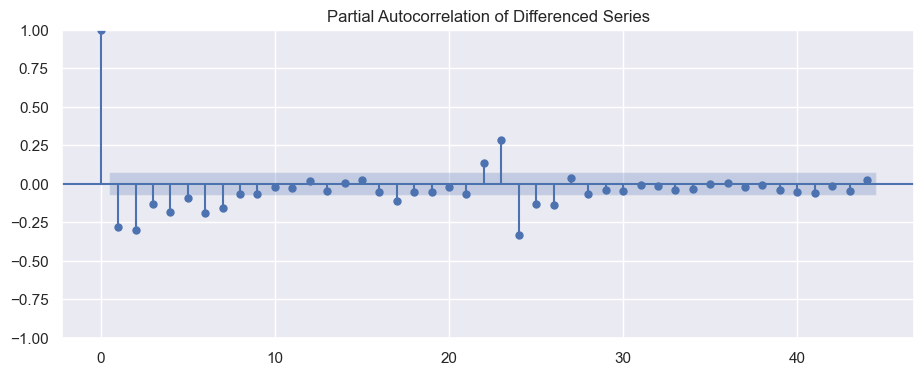

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Usual Differencing
plot_acf(y_sdif, title='Autocorrelation of Differenced Series', lags=np.arange(70) );plt.show()
# Usual Differencing
plot_pacf(y_sdif, title='Partial Autocorrelation of Differenced Series', method='ywm', lags=np.arange(45));plt.show()
plt.show();

Из графиков выше следует следующий выбор параметров.

7 порядка AR (7 лагов PACF ниже нуля и доверительного интервала);</br>
0 порядок MA (хотя 1 и 2 лаги ACF превысили доверительный интервал, при ручном подборе 0 даёт лучше результат);</br>
3 порядок SAR (на PACF 3 периода выше нуля);</br>
1 порядок SMA (на ACF значимый лаг ниже нуля).</br>

In [38]:
forecaster = SARIMAX(order= (7, 0, 0), seasonal_order=(3, 1, 0, SEASON))
forecaster.fit(y_train)
print(forecaster.summary())

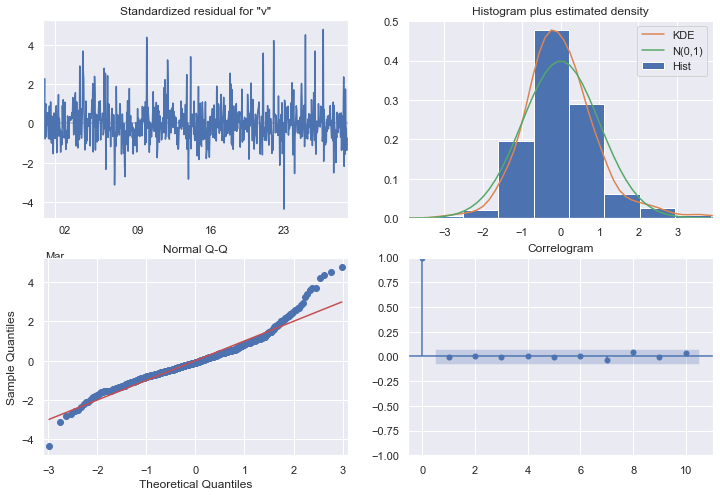

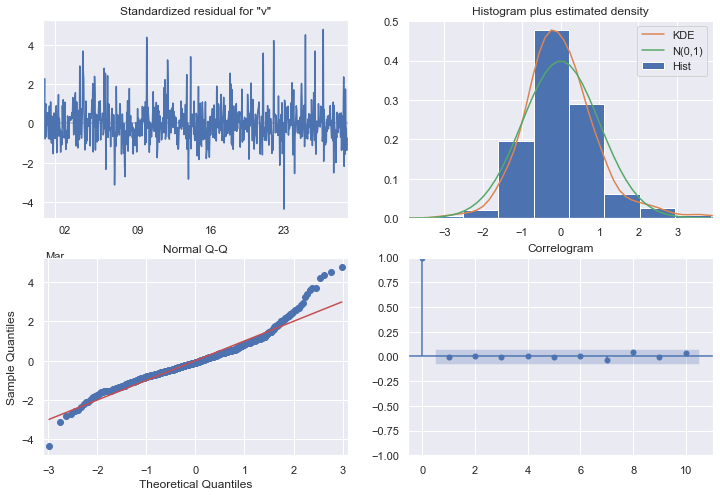

In [ ]:
forecaster._fitted_forecaster.plot_diagnostics(figsize=(12,8))

sMAPE = 0.246


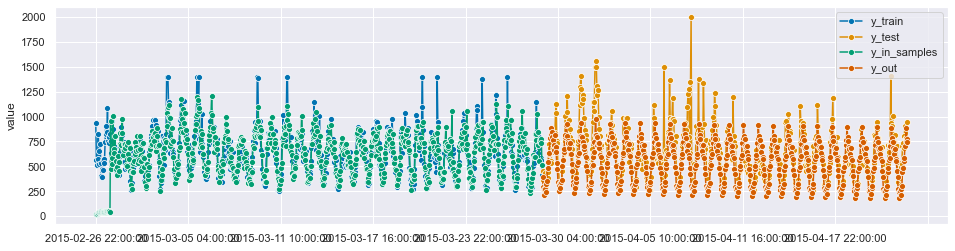

In [ ]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = forecaster.predict(fhin)

y_out = forecaster.predict(fh)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

In [ ]:
model = AutoARIMA(start_p=1,  # начальный порядок AR
                  d=1,        # Порядок производной
                  start_q=0,  # начальный порядок MA
                  max_p=5,    # конечный порядок AR
                  max_q=5,    # конечный порядок MA                 
                  seasonal=True,  # Использовать SARIMA  
                  start_P=0,  # начальный порядок SAR
                  start_Q=0,  # начальный порядок SMA                 
                  D=1,        # Порядок сезонной производной
                  sp=24,      # Период сезонности
                  max_order = 5, # Максимальный порядок p+q+P+Q 
                  trace  = True,   # отчет он-лайн
                  stepwise = True, # метод ускоренного выбора параметров.
                  n_jobs = 1,      # для stepwise парралелизм не доступен.
                  error_action='ignore',  
                  suppress_warnings=True)

model.fit(y_train)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[24] intercept   : AIC=9334.206, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[24] intercept   : AIC=9389.496, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[24] intercept   : AIC=9123.164, Time=6.34 sec
 ARIMA(0,1,1)(0,1,1)[24] intercept   : AIC=inf, Time=7.69 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=9387.497, Time=0.33 sec
 ARIMA(1,1,0)(2,1,0)[24] intercept   : AIC=9071.856, Time=18.05 sec
 ARIMA(1,1,0)(2,1,1)[24] intercept   : AIC=inf, Time=31.16 sec
 ARIMA(1,1,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.91 sec
 ARIMA(0,1,0)(2,1,0)[24] intercept   : AIC=9137.631, Time=15.14 sec
 ARIMA(2,1,0)(2,1,0)[24] intercept   : AIC=9010.440, Time=23.37 sec
 ARIMA(2,1,0)(1,1,0)[24] intercept   : AIC=9064.335, Time=10.52 sec
 ARIMA(2,1,0)(2,1,1)[24] intercept   : AIC=inf, Time=46.79 sec
 ARIMA(2,1,0)(1,1,1)[24] intercept   : AIC=inf, Time=27.29 sec
 ARIMA(3,1,0)(2,1,0)[24] intercept   : AIC=9006.869, Time=28.00 sec
 ARIMA(3,1,0)(1,1,0)[24] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  725
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 24)   Log Likelihood               -4463.668
Date:                             Tue, 31 Oct 2023   AIC                           8945.335
Time:                                     13:05:13   BIC                           8986.295
Sample:                                 02-26-2015   HQIC                          8961.169
                                      - 03-29-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0315      0.330     -0.095      0.924      -0.679       0.616
ar.L1          0.4262      0.038     11.259      0.000       0.352       0.500
ar.L2         -0.0142      0.045     -0.312      0.755      -0.103       0.075
ar.L3          0.1378      0.045      3.085      0.002       0.050       0.225
ar.L4         -0.0529      0.042     -1.259      0.208      -0.135       0.029
ma.L1         -0.9439      0.022    -42.142      0.000      -0.988      -0.900
ar.S.L24      -0.6362      0.023    -27.118      0.000      -0.682      -0.590
ar.S.L48      -0.2726      0.029     -9.485      0.000      -0.329      -0.216
sigma2      1.993e+04    724.536     27.500      0.000    1.85e+04    2.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               313.26
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.55
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

sMAPE = 1.572


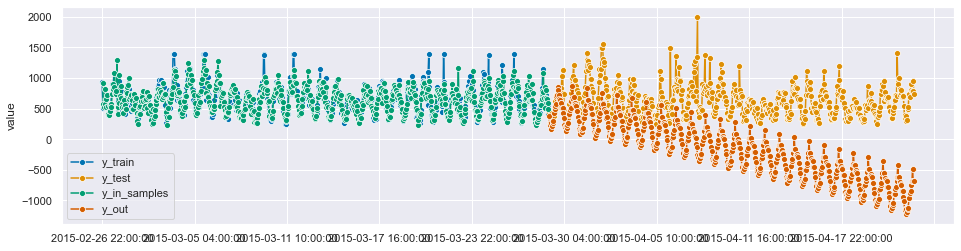

In [ ]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = model.predict(fhin)

y_out = model.predict(fh)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

Автоматический подбор параметров не дал нам необходимого результата. 

<h2>4. Сравнение выбранных методов предсказаний и результатов работы настроенной модели SARIMA</h2>

По результатам исследования временного ряда были получены следующие показатели метрики sMAPE:</br>

NaiveForecaster при SEASON=24 - 0.195, </br>
NaiveForecaster при SEASON=24x7 - 0.176, </br>
ThetaForecaster при SEASON=24x7 - 0.180, </br>
ExponentialSmoothing при SEASON=24x7 - 0.176, </br>
TransformedTargetForecaster c ExponentialSmoothing - 0.173, </br>
SARIMAX при SEASON=24 - 0.246, </br>
AutoARIMA  при SEASON=24 - 1.572 </br>

<h2>5. Классификация временных рядов

In [ ]:
# Импортируем необходимымые библиотеки

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import sktime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

from sktime.transformations.panel.rocket import MiniRocket
from sktime.datasets import load_from_tsfile
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sktime.datatypes import convert_to

In [ ]:
# Считывание ранее подготовленных данных

data = pd.read_csv('data.csv', index_col='timestamp', parse_dates=True)

In [ ]:
data.sample(5)

,value,h
timestamp,,
2015-03-15 05:00:00,464,60
2015-03-31 18:00:00,1277,216
2015-03-10 19:00:00,909,228
2015-04-22 08:00:00,314,96
2015-03-29 10:00:00,335,120


Попробуем разработать классификатор дней недели (выходной/рабочий) по почасовому упоминанию Amazon в Twitter

In [ ]:
data['day_of_the_week'] = pd.to_datetime(data.index).weekday
data.sample(5)

,value,h,day_of_the_week
timestamp,,,
2015-04-14 14:00:00,956,168,1
2015-04-10 16:00:00,898,192,4
2015-03-24 15:00:00,888,180,1
2015-02-26 22:00:00,931,264,3
2015-03-22 09:00:00,360,108,6


In [ ]:
# Функция сигментации данных
def to_segments(df, column, size = 24):  
    df.index.hour[0]
    start_idx = 24-df.index.hour[0]
    df = df.iloc[start_idx:]
    val = df[[column]].values
    return val[:size*(val.size//size)].reshape(-1,size)

Создадим массивы сегментированных данных для рабочих дней и выходных

In [ ]:
#monday = to_segments(data[data['day_of_the_week'] == 0], 'value', size = 24)
#tuesday = to_segments(data[data['day_of_the_week'] == 1], 'value', size = 24)
#wednesday = to_segments(data[data['day_of_the_week'] == 2], 'value', size = 24)
#turhday = to_segments(data[data['day_of_the_week'] == 3], 'value', size = 24)
#friday = to_segments(data[data['day_of_the_week'] == 4], 'value', size = 24)
#saturday = to_segments(data[data['day_of_the_week'] == 5], 'value', size = 24)
#sunday = to_segments(data[data['day_of_the_week'] == 6], 'value', size = 24)

working_week = to_segments(data[data['day_of_the_week'] <= 5], 'value', size = 24)
week_end = to_segments(data[data['day_of_the_week'] > 5], 'value', size = 24)

In [ ]:
#print(monday.shape, turhday.shape, friday.shape, sunday.shape)

print(working_week.shape, week_end.shape)

(46, 24) (7, 24)


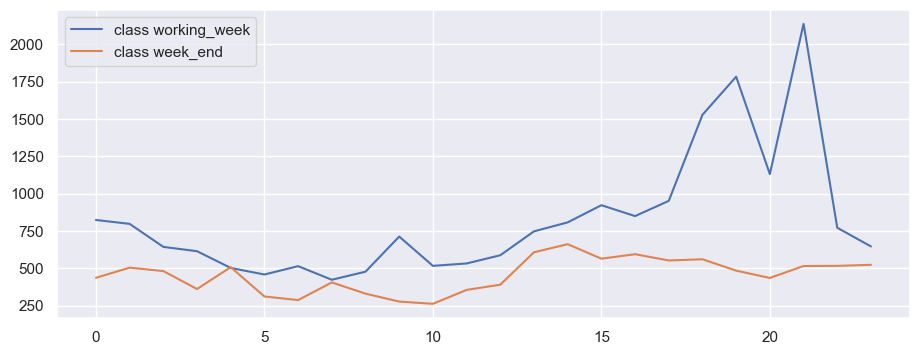

In [ ]:
plt.figure()
day = 5
#for i,(c,d) in enumerate(zip([monday, tuesday, wednesday, turhday, friday, saturday, sunday],
#                             ['monday', 'tuesday', 'wednesday', 'turhday', 'friday', 'saturday', 'sunday'])):

for i,(c,d) in enumerate(zip([working_week, week_end],
                             ['working_week', 'week_end'])):
    plt.plot(c[day], label="class " + str(d))
plt.legend(loc="best")
plt.show()
plt.close()

Разобъём на обучающую и тестовую выборку

In [ ]:
X = np.concatenate((
                    working_week, 
                    week_end
                   ))
y = np.concatenate((
                    0*np.ones(working_week.shape[0]),
                    1*np.ones(week_end.shape[0]),
                   ))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37, 24) (37,) (16, 24) (16,)


In [ ]:
from sktime.datatypes import convert_to
df_train = convert_to(np.atleast_3d(X_train).transpose(0,2,1), to_type="nested_univ") 
df_test  = convert_to(np.atleast_3d(X_test ).transpose(0,2,1), to_type="nested_univ") 

Используем классификатор на основе признаков

In [ ]:
from sktime.classification.interval_based import (TimeSeriesForestClassifier, 
                                                  RandomIntervalSpectralEnsemble, 
                                                  SupervisedTimeSeriesForest)
clf = TimeSeriesForestClassifier(n_estimators=100,random_state=47)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score TimeSeriesForestClassifier {test_score:.3f}')
table = pd.DataFrame([['TimeSeriesForestClassifier', test_score]], columns=['method', 'test_score'])

clf = RandomIntervalSpectralEnsemble(n_estimators=100, random_state=47)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score RandomIntervalSpectralEnsemble {test_score:.3f}')
table2 = pd.DataFrame([['RandomIntervalSpectralEnsemble', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])

clf = SupervisedTimeSeriesForest(n_estimators=100, random_state=47)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score SupervisedTimeSeriesForest {test_score:.3f}')
table2 = pd.DataFrame([['SupervisedTimeSeriesForest', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])


 test score TimeSeriesForestClassifier 0.875
 test score RandomIntervalSpectralEnsemble 0.875
 test score SupervisedTimeSeriesForest 0.875


Используем классификатор на основе шейплетов

In [ ]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

clf = ShapeletTransformClassifier(estimator=RandomForestClassifier(n_estimators=100),
                                  n_shapelet_samples=100,
                                  max_shapelets=100,
                                  batch_size=20)

clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score ShapeletTransformClassifier {test_score:.3f}')
table2 = pd.DataFrame([['ShapeletTransformClassifier', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])


 test score ShapeletTransformClassifier 0.875


Используем 1-NN DTW классификатор

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="ddtw")
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score KNeighborsTimeSeriesClassifier {test_score:.3f}')
table2 = pd.DataFrame([['KNeighborsTimeSeriesClassifier', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])


 test score KNeighborsTimeSeriesClassifier 0.812


Используем классификаторы sclearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score RandomForestClassifier {test_score:.3f}')
table2 = pd.DataFrame([['RandomForestClassifier', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f' test score KNeighborsClassifier {test_score:.3f}')
table2 = pd.DataFrame([['KNeighborsClassifier', test_score]], columns=['method', 'test_score'])
table = pd.concat([table, table2])

 test score RandomForestClassifier 0.875
 test score KNeighborsClassifier 0.875


In [ ]:
table

,method,test_score
0,TimeSeriesForestClassifier,0.8750
0,RandomIntervalSpectralEnsemble,0.8750
0,SupervisedTimeSeriesForest,0.8750
0,ShapeletTransformClassifier,0.8750
0,KNeighborsTimeSeriesClassifier,0.8125
0,RandomForestClassifier,0.8750
0,KNeighborsClassifier,0.8750


В целом классификаторы справляются с задачей классификации, но оценить, какой из методов более точный достаточно сложно из-за недостаточности тестовой выборки. При этом наибольшое постоянство на показателе 0.875 показывают методы на основе словарей.

<h2>6. Классификация при помощи глубоких нейронных сетей в пакете tsai</h2>

In [ ]:
from tsai.all import *
import warnings


In [ ]:
computer_setup()

os              : Windows-10-10.0.22621-SP0
python          : 3.11.5
tsai            : 0.3.7
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.0.1+cpu
cpu cores       : 4
threads per cpu : 2
RAM             : 15.78 GB
GPU memory      : [2.0] GB


Разделим выборку на на тренировочную, валидационную и тестовую

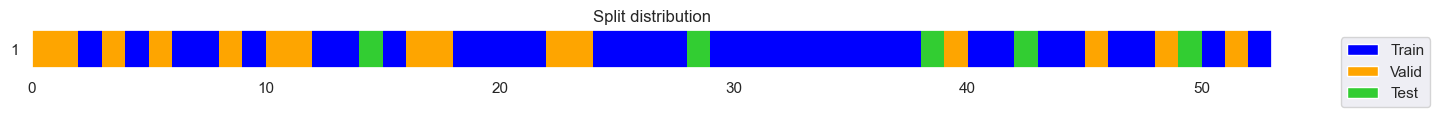

((#33) [4,34,32,30,12,6,21,41,19,15...],
 (#15) [16,3,11,22,1,23,5,8,51,10...],
 (#5) [38,28,49,14,42])

In [ ]:
splits = get_splits(y, 
                    n_splits=1, 
                    valid_size=0.3, 
                    test_size=0.1, 
                    shuffle=True, 
                    balance=False, 
                    stratify=True,
                    random_state=42, 
                    show_plot=True, 
                    verbose=True)
splits

In [ ]:
X = np.atleast_3d(X.astype('float')).transpose(0,2,1)
y = y.astype('float')

print(X.shape, y.shape)
print (y)

(53, 24, 1) (53,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1.]


Создадим набор данных. Такой набор будет экземпляром класса TSDatasets. В наборе данных зададим разделение данных и необходимые преобразования tfms.

Также сконфигурируем загрузчик батчей TSDataLoaders. Загрузим тренировочный и валидационный наборы данных.

In [ ]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

bs = 4
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs*2])

Среди анализируемых архитектур мы рассмотрим рекуррентные RNN, LSTM и GRU с 3 и 4 слоями: как двунаправленные, так и однонаправленные варианты.  Кроме рекуррентных нейронных сетей мы также попробуем ряд стандартных сверточных архитектур, таких как ResNet1d, InceptionTime, XceptionTime и TCN. 

In [ ]:
archs = [
         (RNNPlus, {'n_layers':3, 'bidirectional': True} ),
         (LSTMPlus,{'n_layers':3, 'bidirectional': True} ),
         (GRUPlus, {'n_layers':3, 'bidirectional': True} ),   
         (RNNPlus, {'n_layers':4, 'bidirectional': True} ),
         (RNNPlus, {'n_layers':4, 'bidirectional': False}),  
         (LSTM,    {'n_layers':3, 'bidirectional': False}), 
         (RNN,     {'n_layers':3, 'bidirectional': True} ), 
         (LSTM,    {'n_layers':3, 'bidirectional': True} ),
         (GRU,     {'n_layers':3, 'bidirectional': True} ),   
         (ResNet, {}), 
         (InceptionTime, {}), 
         (XceptionTime,  {}), 
         (TCN, {}),   
         (LSTM_FCN, {}), 
         (TST, {}),
         (FCN, {}),   
        ]

По результатам обучения каждой модели мы занесем в таблицу полученные результаты, в том числе точность для валидационного набора данных и время обучения.

In [ ]:
from IPython.display import clear_output

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])

for i, (arch, k) in enumerate(archs):
   
    model = create_model(arch, dls=dls, **k)
    
    print(model.__class__.__name__)
    
    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(20, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
    clear_output()
    display(results)

,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,ResNet,{},490242,0.168145,0.319652,0.933333,9
1,InceptionTime,{},459522,0.145057,0.339814,0.933333,14
2,LSTM_FCN,{},326330,0.177946,0.315946,0.933333,7
3,LSTMPlus,"{'n_layers': 3, 'bidirectional': True}",584402,0.344347,0.420364,0.866667,8
4,GRUPlus,"{'n_layers': 3, 'bidirectional': True}",438402,0.237377,0.379734,0.866667,7
5,RNNPlus,"{'n_layers': 4, 'bidirectional': False}",73402,0.161649,0.557874,0.866667,5
6,LSTM,"{'n_layers': 3, 'bidirectional': False}",212202,0.375471,0.394183,0.866667,6
7,LSTM,"{'n_layers': 3, 'bidirectional': True}",584402,0.279884,0.450419,0.866667,8
8,GRU,"{'n_layers': 3, 'bidirectional': True}",438402,0.275538,0.499220,0.866667,7
9,XceptionTime,{},402900,0.614880,0.630222,0.866667,15


Наилучший результат по точности и времени показал LSTM-FCN. Этот алгоритм состоит из 2 частей: блока LSTM и части FCN с 3 слоями свертки.

In [ ]:
arch = LSTM_FCN
k = {}
model = create_model(arch, dls=dls, **k)
model = build_ts_model(arch, arch_config=k, dls=dls)

Определяем оптимальную скорость обучения.

SuggestedLRs(valley=0.00363078061491251)

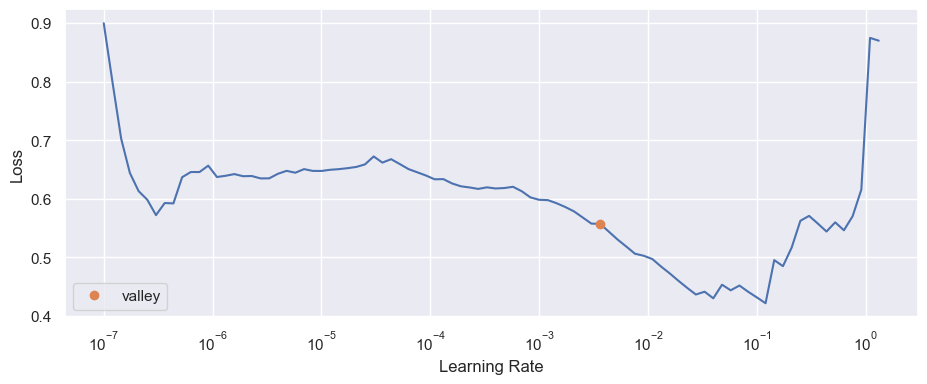

In [ ]:
learn = ts_learner(dls, arch=model, metrics=accuracy) 
learn.lr_find()

Запустим обучение

epoch,train_loss,valid_loss,accuracy,time
0,0.246692,0.284056,0.866667,00:00
1,0.227220,0.301690,0.866667,00:00
2,0.215713,0.295167,0.866667,00:00
3,0.214718,0.274007,0.866667,00:00
4,0.232883,0.269979,0.866667,00:00
5,0.237879,0.278670,0.866667,00:00
6,0.219451,0.254222,0.866667,00:00
7,0.192366,0.236859,0.866667,00:00
8,0.186211,0.226414,0.866667,00:00
9,0.170492,0.275283,0.866667,00:00


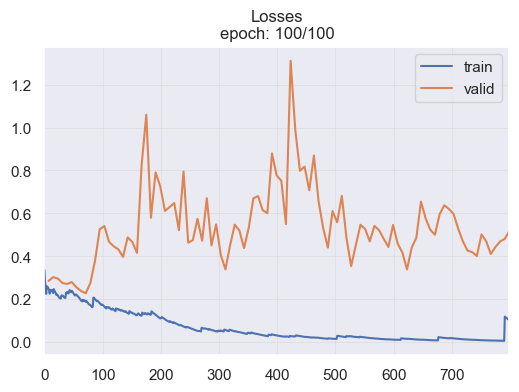

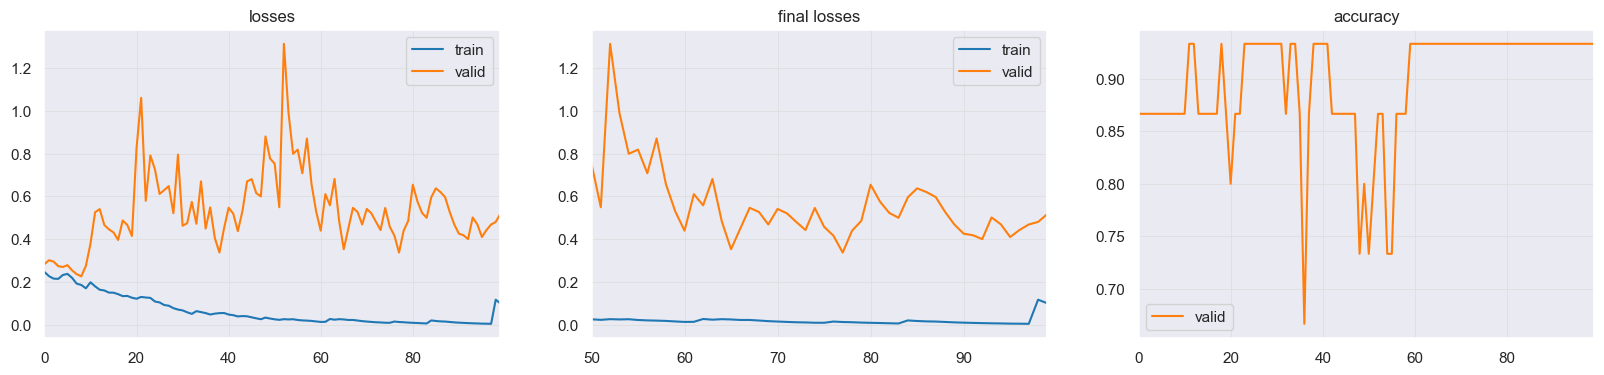

In [ ]:
learn = Learner(dls, model,  metrics=accuracy)
start = time.time()
learn.fit_one_cycle(n_epoch = 100, lr_max = 0.0036, cbs=ShowGraph())

Выведем матрицу ответов

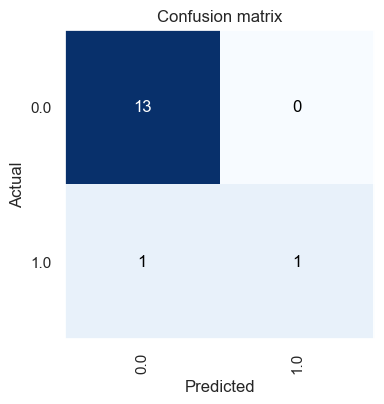

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
probas, _, preds = learn.get_X_preds(X[splits[2]])
from sklearn.metrics import accuracy_score

print(y[splits[2]])
print(probas)

accuracy_score(np.argmax(probas,axis=-1),y[splits[2]])

[0. 0. 1. 0. 0.]
tensor([[9.3694e-01, 6.3065e-02],
        [1.0000e+00, 2.2453e-09],
        [9.9887e-01, 1.1264e-03],
        [9.9998e-01, 2.2884e-05],
        [9.4686e-01, 5.3144e-02]])


0.8

Оценивать качаство классификации на временном ряду из 53 дней достаточно сложно из-за недостаточности тестовой выборки. Если брать по валидационной выборке, то LSTM-FCN показал наилучший результат из примененных методов.

<h2>7. Выявление аномалий во временном ряду<h2>

In [ ]:
data = data.drop(['h','day_of_the_week'], axis=1)

In [ ]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(data)
anomalies.values.sum()

28

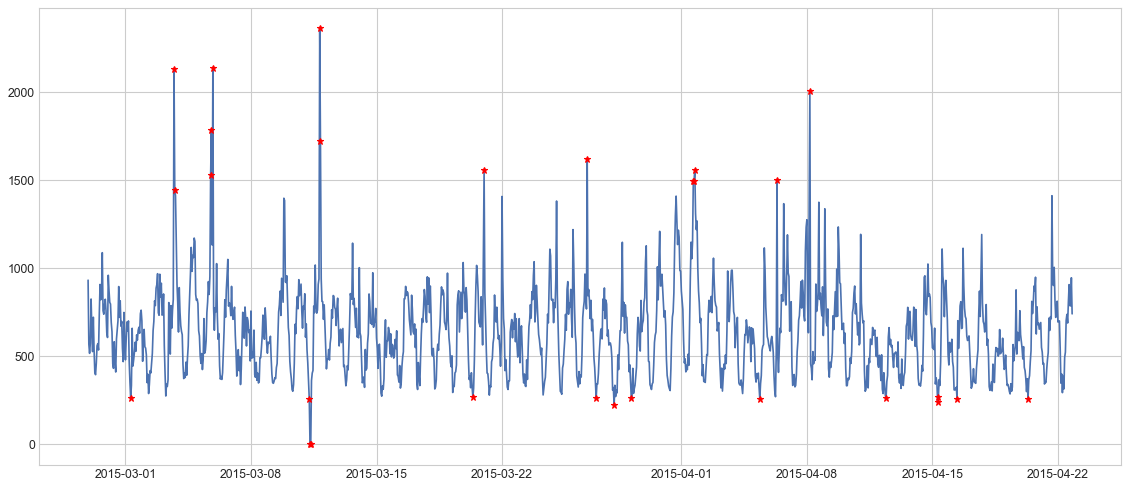

In [ ]:
data2 = data.copy()
data2['a'] = anomalies['value']
data_a = data2[data2['a'] == True].copy()

figure(figsize=(14, 6), dpi=80, layout='constrained')
plt.plot(data.value)
plt.plot(data_a.value, color='red', marker='*', linestyle='', label = "anomalies")

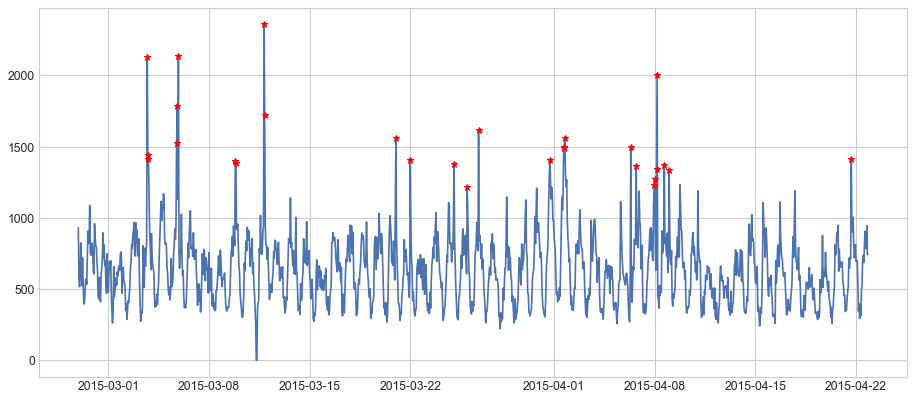

In [ ]:
from adtk.detector import SeasonalAD
seasonal_vol = SeasonalAD()
anomalies = seasonal_vol.fit_detect(data.value)

data2 = data.copy()
data2['a'] = anomalies
data_a = data2[data2['a'] == True].copy()

figure(figsize=(14, 6), dpi=80)
plt.plot(data.value)
plt.plot(data_a.value, color='red', marker='*', linestyle='',)

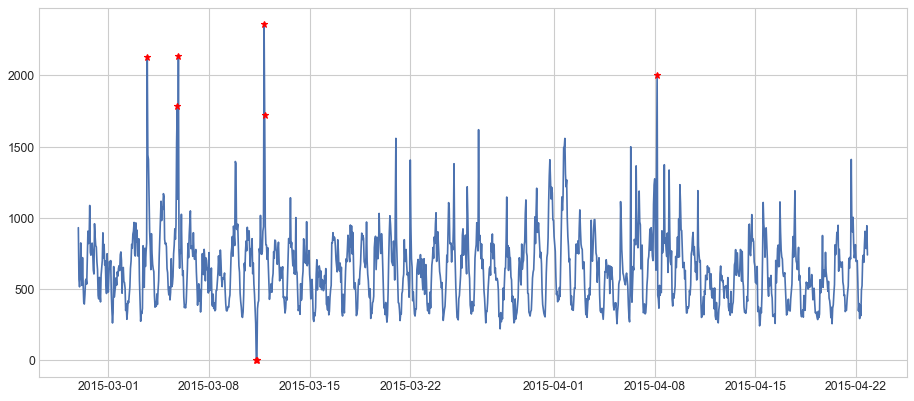

In [ ]:
y = data.value.values.reshape(-1, 1)

from sklearn.cluster import DBSCAN, KMeans
model=DBSCAN(eps = 100., min_samples = 5)
#model = KMeans(n_clusters=2)

model.fit(y)
colors = model.labels_
cls,counts = np.unique(colors, return_counts=True)
sort_idx = np.argsort(counts)

data2 = data.copy()
data2['a'] = colors
data_a = data2[data2['a'] == -1].copy()

figure(figsize=(14, 6), dpi=80)
plt.plot(data.value)
plt.plot(data_a.value, color='red', marker='*', linestyle='',)

Проведён анализ временного ряда на наличие аномалий тремя методами QuantileAD, SeasonalAD, DBSCAN.

По визуальному анализу графиков лучше всех сработал DBSCAN, который выявил как нулевое значение, так и пики выше 1500 упоминаний. SeasonalAD выявил только максимумы, при чём собрал максимальное их количество. QuantileAD записал в аномалии минимальные значения по недельным циклам, что не совсем корректно.

Природой таких аномалий могут быть:</br>
- временно неработающий Твиттер (для нулевых значений);
- громкий инфоповод у Амазона (для максимумов).



<h2>Заключение

В работе был проанализирован временной ряд упоминаний интернет-магазина Amazon в социальной сети Twitter.

Были проведены следующие этапы исследования:
- Предварительный анализ временного ряда;
- Предсказание значений с использованием различных методов;
- Использование модели SARIMA для прогнозирования значений;
- Сравнение модели SARIMA и использованных методов;
- Классификация сегментов временных рядов с использованием различных методов;
- Классификация сегментов временного ряда с использованием нейронных сетей;
- Поиск аномалий.

Эти задачи помогли углубить понимание теории и практики по анализу и моделирования временных рядов.

Результаты SARIMAX хуже. Но из-за нехватки вычислительных мощностей не получилось провести расчёты при параметре SEASON=24x7, а также применить AutoARIMA c max_oder больше 5.</br></br>
Наиболее точные прогнозы были достигнуты при использовании пайплайна, на котором был применён Deseasonalizer и для недельного цикла, и для суточного.